# sklearn包含的机器学习方式

- Classification 分类
- Regression 回归
- Clustering 非监督分类
- Dimensionality reduction 数据降维
- Model Selection 模型选择
- Preprocessing 数据预处理

# 选择学习方法

In [2]:
# 此处需要插入图片

# 通用学习方式

## 导入模块

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 创建数据

In [35]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

print(iris_X[:2])
print(iris_y[:2])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]]
[0 0]


把数据集分为训练集和测试集

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3)

print(y_train)

[1 0 0 2 2 1 1 0 0 0 2 1 2 0 2 1 0 1 1 2 0 1 0 0 2 1 1 1 0 0 2 2 2 0 1 2 2
 1 1 0 0 1 2 2 0 2 2 2 2 1 0 2 0 2 2 2 1 2 0 0 1 1 0 2 1 1 1 0 2 0 2 2 1 1
 2 1 1 1 2 1 1 2 0 0 1 2 0 1 1 0 0 2 1 2 1 0 2 1 2 2 0 0 0 1 1]


## 建立模型-训练-测试

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(y_test)

[2 0 1 0 0 0 2 1 2 1 0 1 0 1 2 2 2 2 0 1 2 0 1 0 2 0 0 0 2 2 1 2 2 0 0 1 2
 1 2 0 1 2 0 0 0]
[2 0 1 0 0 0 2 1 2 1 0 1 0 1 2 1 2 2 0 1 2 0 1 0 2 0 0 0 2 2 1 2 2 0 0 1 1
 1 2 0 1 2 0 0 0]


# 常用属性功能

这里以 LinearRegressor 为例

In [13]:
from sklearn.linear_model import LinearRegression

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X, data_y)
print(model.predict(data_X[:4]))

[ 30.00821269  25.0298606   30.5702317   28.60814055]


## 参数和分数

In [ ]:
model.coef_和model.intercept_属于Model属性，
对于LinearRegresor这个模型，这两个属性分别输出模型的斜率和截距

In [14]:
print(model.coef_)
print(model.intercept_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


model.get_params()可以取出之前定义的参数

In [15]:
print(model.get_params())

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': 1}


model.score(data_X, data_y) 它可以对 Model 用 R^2 的方式进行打分

> R平方：决定系数，反应因变量的全部变异能通过回归关系被自变量解释的比例。如R平方为0.8，则表示回归关系可以解释因变量80%的变异。换句话说，如果我们能控制自变量不变，则因变量的变异程度会减少80%

In [16]:
print(model.score(data_X, data_y))

0.740607742865


# 标准化Normalization

## 数据标准化

In [18]:
from sklearn import preprocessing
import numpy as np

a = np.array([[10, 2.7, 3.6],
              [-100, 5, -2],
              [120, 20, 40]], dtype=np.float64)
print(a)

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]


标准化后的a

In [19]:
print(preprocessing.scale(a)) 

[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


## 标准化对机器学习的影响

In [20]:
%matplotlib inline

from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

生成适合做Classification的数据

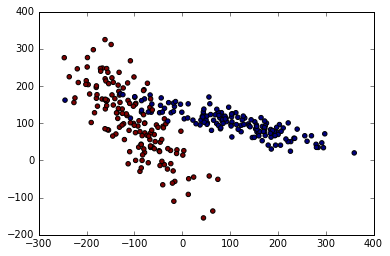

In [28]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                          random_state=22, n_clusters_per_class=1, scale=100)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

数据标准化前

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.522222222222


数据标准化后,X被压缩到差不多大小的范围

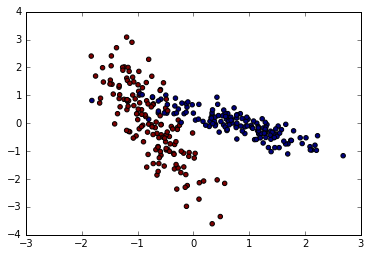

In [30]:
X = preprocessing.scale(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.977777777778


# 交叉验证

## Model基础验证法

In [38]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.977777777778


## Model交叉验证(Cross Validation)

In [46]:
from sklearn.cross_validation import cross_val_score

# 使用交叉验证模块
scores = cross_val_score(knn, X, y, cv=5, scoring="accuracy")

# 5次的预测准确率
print(scores)

# 5次预测准确率平均值
print(scores.mean())

[ 0.9         0.96666667  0.93333333  0.9         1.        ]
0.94


## 以准确率(accuracy)找最合适参数

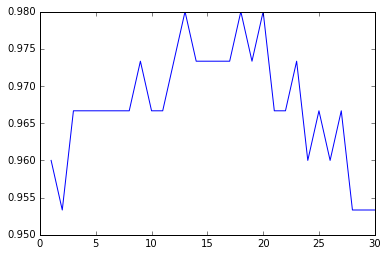

In [47]:
k_arange = np.arange(1, 31)
k_scores = []

for i in k_arange:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    k_scores.append(score.mean())
    
plt.plot(k_arange, k_scores)
plt.show()

## 平均方差(Mean squared error)

一般来说平均方差会用于判断回归模型的好坏

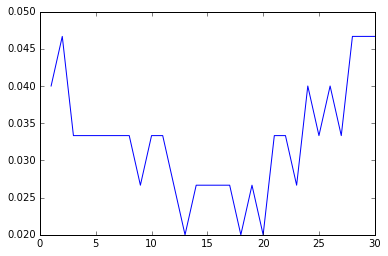

In [57]:
k_arange = np.arange(1, 31)
k_scores = []

for i in k_arange:
    knn = KNeighborsClassifier(n_neighbors=i)
    loss = -
    cross_val_score(knn, X, y, cv=10, scoring="neg_mean_squared_error")
    k_scores.append(loss.mean())

plt.plot(k_arange, k_scores)
plt.show()

## Learning curve检视过拟合

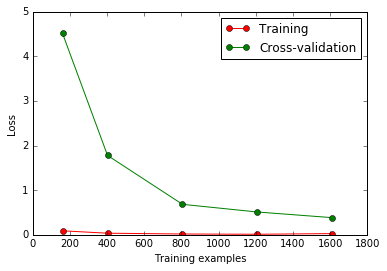

In [67]:
from sklearn.learning_curve import learning_curve
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

train_size, train_loss, test_loss = learning_curve(SVC(gamma=0.001), X, y, cv=10,
                                                   scoring="neg_mean_squared_error",
                                                  train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

# 平均每一轮所得到的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_size, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(train_size, test_loss_mean, 'o-', color="g", label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

## validation_curve检视过拟合

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


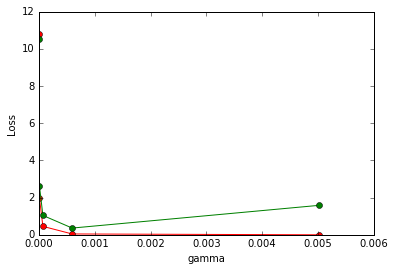

In [72]:
from sklearn.learning_curve import validation_curve

# 建立参数测试集
param_range = np.logspace(-6, -2.3, 5)

# 使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(SVC(), X, y, param_name="gamma", 
                                         param_range=param_range, cv=10, 
                                         scoring="neg_mean_squared_error")
# 平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# 可视化图形
plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.plot(param_range, train_loss_mean, 'o-', color="r")
plt.plot(param_range, test_loss_mean, 'o-', color="g")

plt.show()

# 保存模型

## 使用pickle保存

## 使用joblib保存